In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
# from plotnine import *
# import patchworklib as pw

In [2]:
df = pd.read_csv('C:\\Users\\hs324\\OneDrive\\Desktop\\Class_Files\\06_2022Fall\\04_Practicum\\Quantilope_Core\\data\\brands_w_m3gender_region_nov10.csv')

In [3]:
df2 = df.groupby(['gender_m3', 'age_m3']).size().reset_index(name='Freq')

df2['Perc'] = df2['Freq'] / df2.groupby('gender_m3')['Freq'].transform('sum')

In [4]:
df2['age_m3'] = pd.Categorical(df2['age_m3'], [">=40", "30-39", "19-29","<=18"])
df2.sort_values("age_m3")

,gender_m3,age_m3,Freq,Perc
3,NB,>=40,9,0.173077
7,female,>=40,651,0.194386
11,male,>=40,3677,0.285881
1,NB,30-39,9,0.173077
5,female,30-39,772,0.230517
9,male,30-39,2886,0.224382
0,NB,19-29,23,0.442308
4,female,19-29,1523,0.454763
8,male,19-29,4715,0.366584
2,NB,<=18,11,0.211538


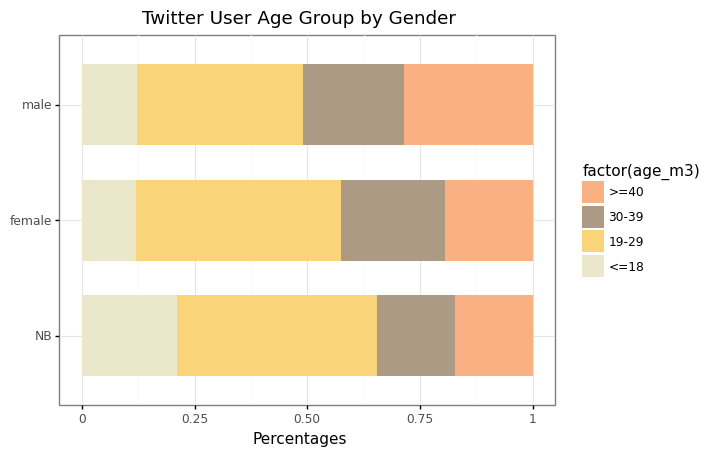

<ggplot: (8781940158193)>

In [5]:
(ggplot(
    data=df2, 
    mapping=aes(x='gender_m3', 
                y="Freq", fill="factor(age_m3)")) + 
 geom_col(position="fill", width = 0.7) + 
 labs(x = "", y = 'Percentages', title = "Twitter User Age Group by Gender") + 
 scale_fill_manual(values = ['#F9B183', '#AD9A85', '#F9D479',  '#EBE7CB']) + 
 theme_bw() + 
 coord_flip())

In [5]:
df = df[df.brand.isin(["Adidas", "Converse", "New Balance", "Nike", "Reebok"])]

In [11]:
# a snippet of what the activites looks like 
df[['retweets','replies','likes','quote_count']][:5]

,retweets,replies,likes,quote_count
0,3,1,9,1
1,0,0,0,0
2,0,0,0,0
3,0,2,1,0
4,0,0,0,0


In [12]:
# Size of each brand
df2 = df.groupby('brand').size().reset_index().rename({0 : 'size_count'}, axis = 1)
df2.sort_values('size_count', ascending = False)

,brand,size_count
3,Nike,8451
0,Adidas,2483
1,Converse,992
2,New Balance,714
4,Reebok,265


In [13]:
df3 = df.groupby('brand')['retweets', 'replies', 'likes', 'quote_count'].mean()
df3 = df3.reset_index()
df3 = df3.merge(df2, on ='brand')
df3

,brand,retweets,replies,likes,quote_count,size_count
0,Adidas,0.711236,0.802255,6.503826,0.161498,2483
1,Converse,0.462702,0.684476,6.407258,0.100806,992
2,New Balance,0.826331,0.705882,7.292717,0.149860,714
3,Nike,0.563720,0.644066,6.964975,0.114898,8451
4,Reebok,0.320755,0.483019,5.664151,0.064151,265


In [9]:
df3.set_index('brand').rank(ascending = False)

,retweets,replies,likes,quote_count,size_count
brand,,,,,
Adidas,2.0,1.0,3.0,1.0,2.0
Converse,4.0,3.0,4.0,4.0,3.0
New Balance,1.0,2.0,1.0,2.0,4.0
Nike,3.0,4.0,2.0,3.0,1.0
Reebok,5.0,5.0,5.0,5.0,5.0


In [10]:
# mean retweets
g1 = (ggplot(df3,
      aes(x = "reorder(brand, retweets)", y = "retweets")) + 
 geom_bar(stat="identity", fill = '#00009c', alpha=.6, width=.3) + 
 labs(x = "", y = '', title = "Mean Retweets") + 
 coord_flip() + theme_classic())

# mean replies
g2 = (ggplot(df3,
      aes(x = "reorder(brand, replies)", y = "replies")) + 
 geom_bar(stat="identity", fill='#00009c', alpha=.6, width=.4) + 
 labs(x = "", y = '', title = "Mean Replies") + 
 coord_flip() + theme_classic())

# mean likes
g3 = (ggplot(df3,
      aes(x = "reorder(brand, likes)", y = "likes")) + 
 geom_bar(stat="identity", fill='#00009c', alpha=.6, width=.4) + 
 labs(x = "", y = '', title = "Mean Likes") + 
 coord_flip() + theme_classic())

# mean quote
g4 = (ggplot(df3,
      aes(x = "reorder(brand, quote_count)", y = "quote_count")) + 
 geom_bar(stat="identity", fill='#00009c', alpha=.6, width=.4) + 
 labs(x = "", y = '', title = "Mean Quote Counts") + 
 coord_flip() + theme_classic())

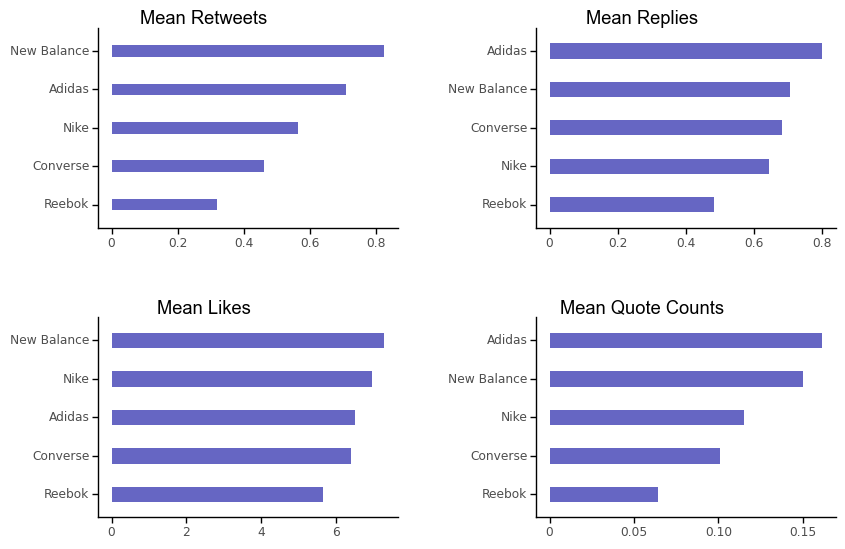

In [11]:
g1 = pw.load_ggplot(g1, figsize=(3,2))
g2 = pw.load_ggplot(g2, figsize=(3,2))
g3 = pw.load_ggplot(g3, figsize=(3,2))
g4 = pw.load_ggplot(g4, figsize=(3,2))

g1234 = (g1|g2)/(g3|g4)
g1234.savefig()

In [12]:
# Mean retweets, replies, likes and quote counts by age groups

df2 = df.groupby('age_m3').size().reset_index().rename({0 : 'size_count'}, axis = 1)
df2.sort_values('size_count', ascending = False)

,age_m3,size_count
0,19-29,5070
3,>=40,3228
1,30-39,3009
2,<=18,1598


In [13]:
df3 = df.groupby('age_m3')['retweets', 'replies', 'likes', 'quote_count'].mean()
df3 = df3.reset_index()
df3 = df3.merge(df2, on ='age_m3')
df3

,age_m3,retweets,replies,likes,quote_count,size_count
0,19-29,0.505325,0.654043,6.009073,0.134714,5070
1,30-39,0.711532,0.793951,7.788634,0.111665,3009
2,<=18,0.570713,0.535670,11.467459,0.078223,1598
3,>=40,0.634758,0.676890,4.909232,0.140025,3228


In [14]:
df3.set_index('age_m3').rank(ascending = False)

,retweets,replies,likes,quote_count,size_count
age_m3,,,,,
19-29,4.0,3.0,3.0,2.0,1.0
30-39,1.0,1.0,2.0,3.0,3.0
<=18,3.0,4.0,1.0,4.0,4.0
>=40,2.0,2.0,4.0,1.0,2.0


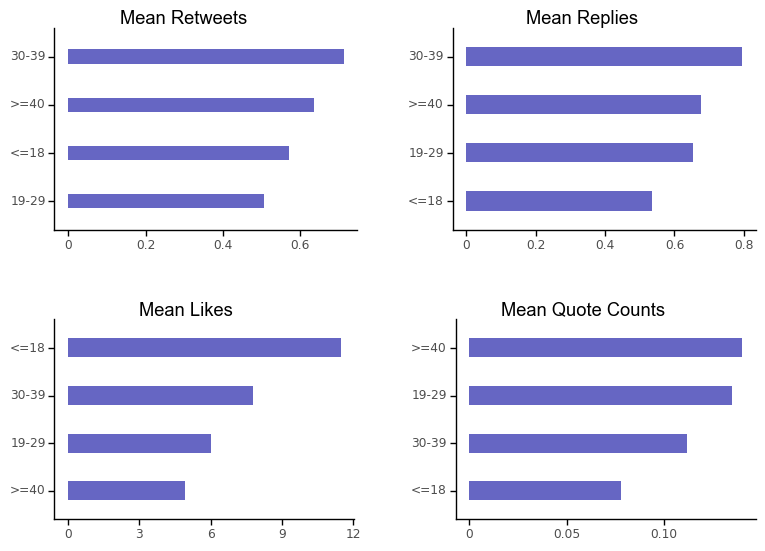

In [15]:
# mean retweets
g1 = (ggplot(df3,
      aes(x = "reorder(age_m3, retweets)", y = "retweets")) + 
 geom_bar(stat="identity", fill = '#00009c', alpha=.6, width=.3) + 
 labs(x = "", y = '', title = "Mean Retweets") + 
 coord_flip() + theme_classic())

# mean replies
g2 = (ggplot(df3,
      aes(x = "reorder(age_m3, replies)", y = "replies")) + 
 geom_bar(stat="identity", fill='#00009c', alpha=.6, width=.4) + 
 labs(x = "", y = '', title = "Mean Replies") + 
 coord_flip() + theme_classic())

# mean likes
g3 = (ggplot(df3,
      aes(x = "reorder(age_m3, likes)", y = "likes")) + 
 geom_bar(stat="identity", fill='#00009c', alpha=.6, width=.4) + 
 labs(x = "", y = '', title = "Mean Likes") + 
 coord_flip() + theme_classic())

# mean quote
g4 = (ggplot(df3,
      aes(x = "reorder(age_m3, quote_count)", y = "quote_count")) + 
 geom_bar(stat="identity", fill='#00009c', alpha=.6, width=.4) + 
 labs(x = "", y = '', title = "Mean Quote Counts") + 
 coord_flip() + theme_classic())

g1 = pw.load_ggplot(g1, figsize=(3,2))
g2 = pw.load_ggplot(g2, figsize=(3,2))
g3 = pw.load_ggplot(g3, figsize=(3,2))
g4 = pw.load_ggplot(g4, figsize=(3,2))

g1234 = (g1|g2)/(g3|g4)
g1234.savefig()

In [22]:
# Mean retweets, replies, likes and quote counts by age groups
df2 = df.groupby('gender_m3').size().reset_index().rename({0 : 'size_count'}, axis = 1)
df2.sort_values('size_count', ascending = False)
df3 = df.groupby('gender_m3')['retweets', 'replies', 'likes', 'quote_count'].mean()
df3 = df3.reset_index()
df3 = df3.merge(df2, on ='gender_m3')
df3

,gender_m3,retweets,replies,likes,quote_count,size_count
0,NB,0.078947,0.684211,3.842105,0.026316,38
1,female,0.758993,0.868905,13.070743,0.129097,2502
2,male,0.555909,0.631548,5.328027,0.122721,10365


In [23]:
df3.set_index('gender_m3').rank(ascending = False)

,retweets,replies,likes,quote_count,size_count
gender_m3,,,,,
NB,3.0,2.0,3.0,3.0,3.0
female,1.0,1.0,1.0,1.0,2.0
male,2.0,3.0,2.0,2.0,1.0


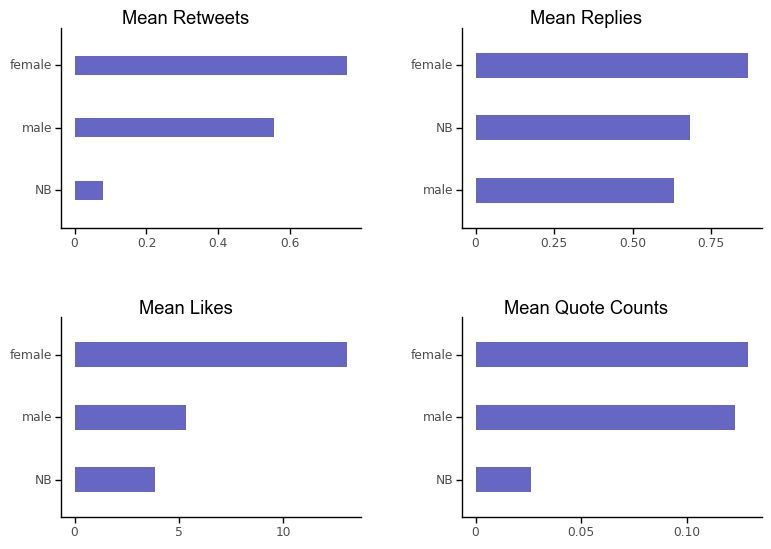

In [24]:
# mean retweets
g1 = (ggplot(df3,
      aes(x = "reorder(gender_m3, retweets)", y = "retweets")) + 
 geom_bar(stat="identity", fill = '#00009c', alpha=.6, width=.3) + 
 labs(x = "", y = '', title = "Mean Retweets") + 
 coord_flip() + theme_classic())

# mean replies
g2 = (ggplot(df3,
      aes(x = "reorder(gender_m3, replies)", y = "replies")) + 
 geom_bar(stat="identity", fill='#00009c', alpha=.6, width=.4) + 
 labs(x = "", y = '', title = "Mean Replies") + 
 coord_flip() + theme_classic())

# mean likes
g3 = (ggplot(df3,
      aes(x = "reorder(gender_m3, likes)", y = "likes")) + 
 geom_bar(stat="identity", fill='#00009c', alpha=.6, width=.4) + 
 labs(x = "", y = '', title = "Mean Likes") + 
 coord_flip() + theme_classic())

# mean quote
g4 = (ggplot(df3,
      aes(x = "reorder(gender_m3, quote_count)", y = "quote_count")) + 
 geom_bar(stat="identity", fill='#00009c', alpha=.6, width=.4) + 
 labs(x = "", y = '', title = "Mean Quote Counts") + 
 coord_flip() + theme_classic())

g1 = pw.load_ggplot(g1, figsize=(3,2))
g2 = pw.load_ggplot(g2, figsize=(3,2))
g3 = pw.load_ggplot(g3, figsize=(3,2))
g4 = pw.load_ggplot(g4, figsize=(3,2))

g1234 = (g1|g2)/(g3|g4)
g1234.savefig()

In [16]:
# Mean retweets, replies, likes and quote counts by org/not org
df2 = df.groupby('org_m3').size().reset_index().rename({0 : 'size_count'}, axis = 1)
df2.sort_values('size_count', ascending = False)
df3 = df.groupby('org_m3')['retweets', 'replies', 'likes', 'quote_count'].mean()
df3 = df3.reset_index()
df3 = df3.merge(df2, on ='org_m3')
df3

,org_m3,retweets,replies,likes,quote_count,size_count
0,is-org,1.525705,0.452736,7.787728,0.258706,603
1,non-org,0.548204,0.688750,6.777597,0.117054,12302


In [17]:
df3.set_index('org_m3').rank(ascending = False)

,retweets,replies,likes,quote_count,size_count
org_m3,,,,,
is-org,1.0,2.0,1.0,1.0,2.0
non-org,2.0,1.0,2.0,2.0,1.0


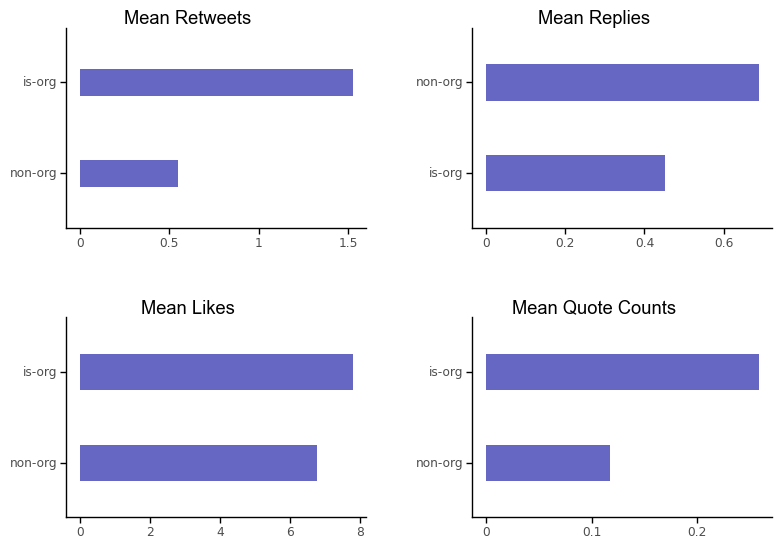

In [18]:
# mean retweets
g1 = (ggplot(df3,
      aes(x = "reorder(org_m3, retweets)", y = "retweets")) + 
 geom_bar(stat="identity", fill = '#00009c', alpha=.6, width=.3) + 
 labs(x = "", y = '', title = "Mean Retweets") + 
 coord_flip() + theme_classic())

# mean replies
g2 = (ggplot(df3,
      aes(x = "reorder(org_m3, replies)", y = "replies")) + 
 geom_bar(stat="identity", fill='#00009c', alpha=.6, width=.4) + 
 labs(x = "", y = '', title = "Mean Replies") + 
 coord_flip() + theme_classic())

# mean likes
g3 = (ggplot(df3,
      aes(x = "reorder(org_m3, likes)", y = "likes")) + 
 geom_bar(stat="identity", fill='#00009c', alpha=.6, width=.4) + 
 labs(x = "", y = '', title = "Mean Likes") + 
 coord_flip() + theme_classic())

# mean quote
g4 = (ggplot(df3,
      aes(x = "reorder(org_m3, quote_count)", y = "quote_count")) + 
 geom_bar(stat="identity", fill='#00009c', alpha=.6, width=.4) + 
 labs(x = "", y = '', title = "Mean Quote Counts") + 
 coord_flip() + theme_classic())

g1 = pw.load_ggplot(g1, figsize=(3,2))
g2 = pw.load_ggplot(g2, figsize=(3,2))
g3 = pw.load_ggplot(g3, figsize=(3,2))
g4 = pw.load_ggplot(g4, figsize=(3,2))

g1234 = (g1|g2)/(g3|g4)
g1234.savefig()